In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/mnt/libraries/Codes/EURECOM/MALIS_project


In [3]:
from pathlib import Path

import torch
from src.models import OnsetsAndFrames
from src.data.data_modules import MAPSDataModule
from src.data.audio import onf_transform
from src.visualization.visualize import make_midi_plots

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [88]:
device= "cpu"
# testing over full audio files
dm = MAPSDataModule(batch_size=1,
                    sample_rate=16000,
                    max_steps=None,
                    audio_transform=onf_transform,
                    hop_length=512,
                    lazy_loading=True,
                    debug=True)
dm.setup(stage="test")

batch = dm.test_ds[1]

audio_feats = batch["audio"].to(device).unsqueeze(0)
onset_true, frame_true, velocity_true = (
    batch["onsets"].to(device),
    batch["frames"].to(device),
    batch["velocity"].to(device),
)
sample_rate = batch["sample_rate"]
hop_length = batch["hop_length"]

dm.test_ds.audio_paths

[PosixPath('data/processed/MAPS_MUS/ENSTDkAm/MAPS_MUS-bk_xmas1_ENSTDkAm.wav'),
 PosixPath('data/processed/MAPS_MUS/ENSTDkAm/MAPS_MUS-chpn-p14_ENSTDkAm.wav')]

In [5]:
model = OnsetsAndFrames.load_from_checkpoint("./models/onf-MAPS-epoch=379-valid_loss=0.08.ckpt",
                                             in_feats=229)
model.to(device).eval()
with torch.no_grad():
    onset_pred, frame_pred, velocity_pred = model(audio_feats)

<Figure size 1440x468 with 0 Axes>

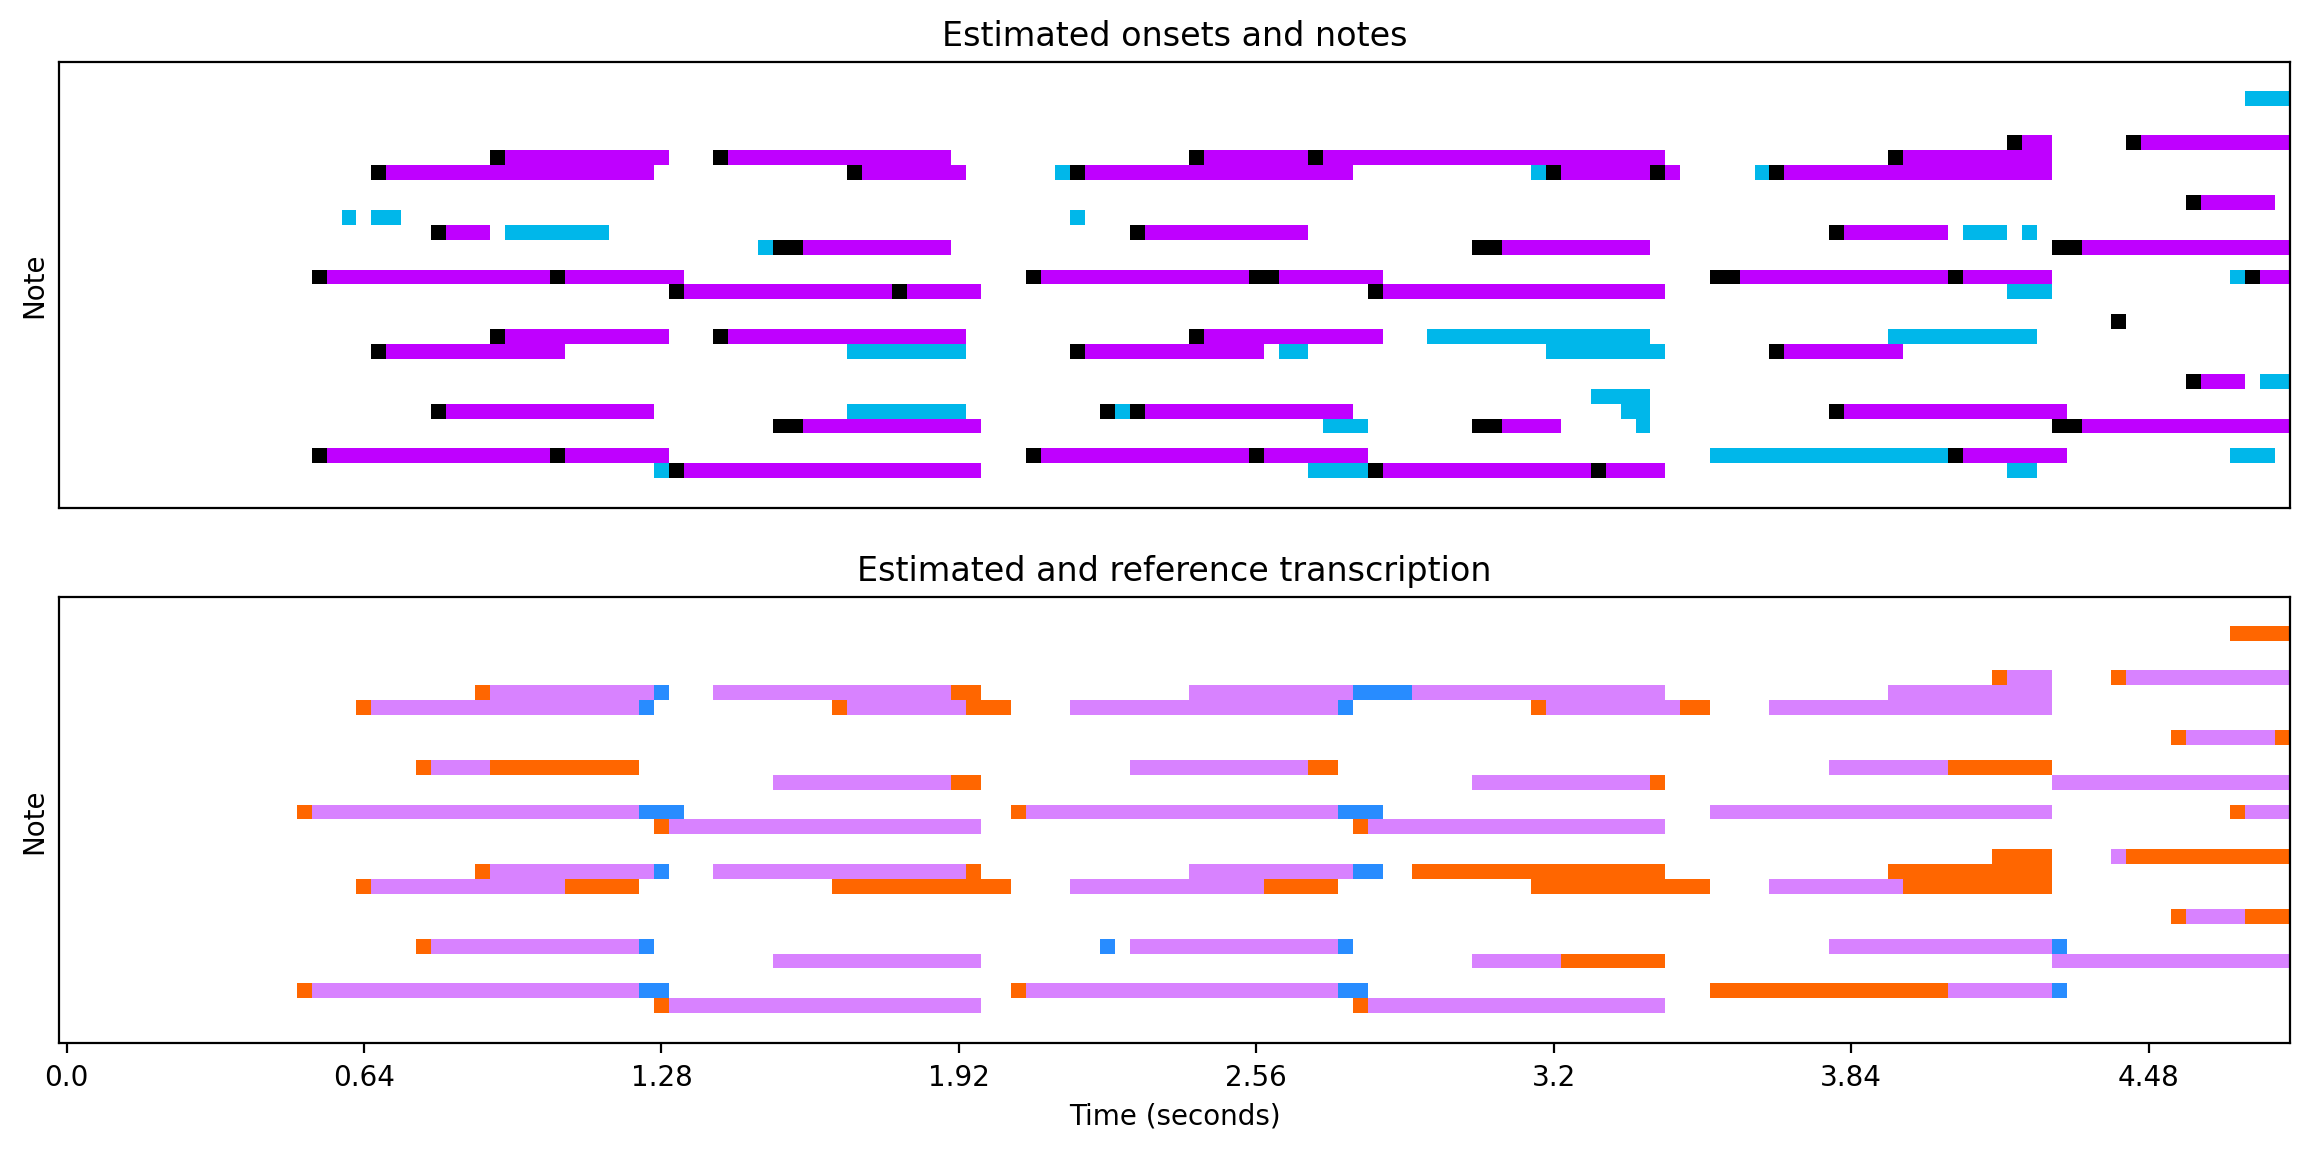

In [89]:
make_midi_plots(onset_pred, frame_pred, onset_true, frame_true,
                sample_rate=16000,
                hop_length=512,
               figsize=(20, 6.5), scale_factor=1,
               note_range=(15, 45), 
                time_range=(0, 150)
               )